# Machine Learning Project (Text-Based Gender Classification of Twitter Data using Naive Bayes and Support Vector Machine)
# Feature Extraction using the Combination of the Randomly Chosen Meta-Attributes and the Most Significant Meta-Attributes
## Quintos, Maria Nikki H.
## Angeles, Angelic L.
## BSCS-ML COM 181

### 1.   Importing the modules, libraries, and dataset

A library is essentially a collection of modules that can be called and used and we can import the libraries by using 'import' to make use of the different functions. This part of the code imports modules and libraries to have access to the functions that we will be needing to build the classification model using Naive Bayes and SVM. Python libraries such as:

1. <b>Numpy</b> - works with arrays and matrices used for computation in the algorithm 
2. <b>Pandas</b> - works with data manipulation and analysis 
3. <b>Sklearn</b> - works with classification, clustering and regression
4. <b>Re</b> - works with regular expressions which are a special sequence of characters that helps you match or find other strings or sets of strings, using a specialized syntax held in a pattern.

In [1]:
import pandas as pd
import numpy as np
import re

<b>Importing the dataset</b>

Data is raw information, it is the representation of both human and machine observation of the world. The dataset that you should used entirely depends on what type of problem you want to solve. This study is mainly focus on the gender classification problem and in this part of the code we are importing the dataset that we will used in the classification task. The dataset collected is from Kaggle. The dataset has 26 independent variables and 20,050 data. Since we are focusing on the text-based gender classification, we will only get the “gender” and “text” variables, where in the “text” represents the Twitter user’s tweets. 

In [2]:
# https://www.kaggle.com/rahulvks/gender-identification-analysis/notebook
# https://stackabuse.com/the-naive-bayes-algorithm-in-python-with-scikit-learn/

url_train = 'https://raw.githubusercontent.com/mdeff/ntds_2016/master/project/reports/twitter_gender/gender-classifier-DFE-791531.csv'
data_with_duplicate = pd.read_csv(url_train, encoding='latin1')

data_with_duplicate.head(5)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


### 2. Data Pre-Processing

We are living in the age of data and data are very significant when implementing machine learning algorithms since this is where the model gets all the information that they should process and learn. Data Pre-Processing is a technique to prepare the data to get more out of it. To have better and improved datasets that are cleaner and are more manageable to analyze and work with, we must apply this technique. The purpose of using this technique is to avoid noisy, inconsistent, and missing data that can lead to poor accuracy of the machine learning model. 

<b>Dropping the duplicates</b>

In this part of the code we are simply removing the duplicates from the DataFrame using the 'drop_duplicates' method and storing the new DataFrame with duplicate rows removed in the 'data' variable.

In [3]:
print(len(data_with_duplicate))
print(data_with_duplicate.columns)
#print(data_with_duplicate.shape)
data = data_with_duplicate.sort_values('text', ascending=True).drop_duplicates('text').sort_index()
print(len(data))

20050
Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')
18412


<b>Getting the significant columns that we will used in the classification task and dealing with missing values</b>

The dataset will surely have missing and noisy data because the data gathering process is not perfect, so the dataset will have many irrelevant and missing parts. Data cleaning is one of the method that we should use to solve this problem. In this part of the code, we are only getting the significant columns that we will used in the classification task which are 'text' (independent variable) that represents the Twitter user's tweets and 'gender' (dependent variable) that represents if the Twitter user is a male or female. Then after getting the significant columns, we will find all the null values in the dataset and replace it with 'XXX' just so that we can easily distinguish if there is any null or missing values in the data. 

In [4]:
# only get the text and label.
data_text_label = data[['text', 'gender']]
print(data_text_label.head(5))

# sanity check of our data
if data_text_label['gender'].isnull().any():
  data_text_label['gender'] = data_text_label['gender'].fillna('XXX')
  print('cleaned')

                                                text  gender
0  Robbie E Responds To Critics After Win Against...    male
1  ÛÏIt felt like they were my friends and I was...    male
2  i absolutely adore when louis starts the songs...    male
3  Hi @JordanSpieth - Looking at the url - do you...    male
4  Watching Neighbours on Sky+ catching up with t...  female
cleaned


<ipython-input-4-52e004f9ebe3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text_label['gender'] = data_text_label['gender'].fillna('XXX')


<b>Data Cleaning</b>

One of the data preprocessing techniques is data cleaning, by applying this technique the model can improve the accuracy and performance of the machine learning model. The Regular Expression (RegEx) method is a faster process of cleaning text data that is simpler to use compared to manually splitting the strings. Regular Expressions (RegEx) are essentially text patterns that you can use to automate searching through and replacing elements within strings of text. We convert all strings into lowercase using '.lower()' method and in this case, we used 're.sub()' method to replace irrelevant and insignificant strings or characters in the 'text' or tweets of the users such as:
1. Converting all strings into lower case
2. Links and urls are removed
3. Remove all non-ASCII code
4. Remove all punctuations
5. Delete double spaces and replace with one space
6. Remove special characters
7. Remove numbers

In [5]:
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub(r"http\S+", "", s)
    encoded_string = s.encode("ascii", "ignore")
    s = encoded_string.decode()
    s = re.sub(r"[^a-zA-Z0-9]+", ' ', s)
    s = re.sub(' +', ' ', s)
    s = re.sub(r"\b\d+\b", "", s)
    s = re.sub(r'[0-9]+', '', s)
    return s
'''
def sample(s):
  return 'M'+s
'''

data_text_label['text'] = data_text_label.apply(lambda x: cleaning(x['text']), axis=1)
data_text_label.head(30)

<ipython-input-5-2b824ad0f5bc>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text_label['text'] = data_text_label.apply(lambda x: cleaning(x['text']), axis=1)


,text,gender
0,robbie e responds to critics after win against...,male
1,it felt like they were my friends and i was li...,male
2,i absolutely adore when louis starts the songs...,male
3,hi jordanspieth looking at the url do you use ...,male
4,watching neighbours on sky catching up with th...,female
5,ive seen people on the train with lamps chairs...,female
6,bpackengineer thank you for your patience whi...,brand
7,gala bingo clubs bought for m the uk s largest...,male
8,aphmau the pic defines all mcd fangirls fanbo...,female
9,evielady just how lovely is the tree this yea...,female


### 3. Feature Extraction 

<b>Extraction of Features or Creation of Randomly Chosen Meta-Attributes</b>

In this part of the code, this is where we create all the methods or functions that we will used to extract the features or create the randomly chosen meta-attributes. We extracted 19 features and meta-attributes by creating our own implementation of their methods. These methods are the following:
1. <b>count_word_in_sentence</b> - counts the number of words in a sentence.
2. <b>count_char_in_sentence</b> - counts the number of characters in a sentence.
3. <b>count_vowels</b> - counts the number of vowels in a text. 
4. <b>count_consonants</b> - counts the number of consonants in a text.
5. <b>aveNum_of_char_per_word</b> - is the ratio of number of characters and number of words.
6. <b>count_spaces</b> - counts the number of blank spaces in a text. 
7. <b>count_articles</b> - counts the number of articles in a sentence.
8. <b>count_pronouns</b> - counts the number of pronouns in a sentence.
9. <b>count_auxiliaryverbs</b> - counts the number of auxiliary verbs in a sentence.
10. <b>count_conjunctions</b> - counts the number of conjunctions in a sentence.
11. <b>count_interjections</b> - counts the number of interjections in a sentence.
12. <b>count_prepositions</b> - counts the number of prepositions in a sentence.
13. <b>ratioSpacesAndCharacters</b> - is the ratio of number of spaces and number of characters.
14. <b>ratioArticlesAndWords</b> - is the ratio of number of articles and number of words.
15. <b>ratioPronounsAndWords</b> - is the ratio of number of pronouns and number of words.
16. <b>ratioAuxiliaryVerbsAndWords</b> - is the ratio of number of auxiliary verbs and number of words.
17. <b>ratioConjunctionsAndWords</b> - is the ratio of number of conjunctions and number of words.
18. <b>ratioInterjectionsAndWords</b> - is the ratio of number of interjections and number of words.
19. <b>ratioPrepositionsAndWords</b> - is the ratio of number of prepositions and number of words.

In [6]:
def count_word_in_sentence(x):
    word_list = x.split(' ')
    return len(word_list)

def count_char_in_sentence(char):
    count_char = len(char) - char.count(" ")
    return (count_char)

def count_vowels(v):
    wordlist = list(v)
    num_vowels=0
    for char in wordlist:
        if char in "aeiou":
            num_vowels = num_vowels+1
    return num_vowels

def count_consonants(c):
    wordlist = list(c)
    num_consonants=0
    for char in wordlist:
        if char in "bcdfghjklmnpqrstvwxyz":
            num_consonants = num_consonants+1
    return num_consonants

def aveNum_of_char_per_word(a):
    word = a.split(' ')
    word_split = len(word)
    count_char = len(a) - a.count(" ")
    return (word_split/count_char)

#def ratio(num1, num2):
    ratio = (num1/num2)
    return ratio

#def count_lowercase(l):
    return sum(1 for x in l if x.islower())

#def count_uppercase(u):
    return sum(1 for x in u if x.isupper())

#def count_digits(d):
    return sum(1 for x in d if x.isdigit())

def count_spaces(s):
    return sum(1 for x in s if x.isspace())

#def count_quotationmarks(q):
    wordlist = list(q)
    num_quotationmarks = 0
    for char in wordlist:
        if char in '"':
            num_quotationmarks += 1
    return num_quotationmarks

#def count_comma(c):
    wordlist = list(c)
    num_comma = 0
    for char in wordlist:
        if char in ",":
            num_comma += 1
    return num_comma

#def count_colons(c):
    wordlist = list(c)
    num_colons = 0
    for char in wordlist:
        if char in ":":
            num_colons += 1
    return num_colons

#def count_semicolons(c):
    wordlist = list(c)
    num_semicolons = 0
    for char in wordlist:
        if char in ";":
            num_semicolons += 1
    return num_semicolons

#def count_questionmarks(q):
    wordlist = list(q)
    num_questionmarks = 0
    for char in wordlist:
        if char in "?":
            num_questionmarks += 1
    return num_questionmarks

#def count_exclamationpoints(e):
    wordlist = list(e)
    num_exclamationpoints = 0
    for char in wordlist:
        if char in "!":
            num_exclamationpoints += 1
    return num_exclamationpoints

#def count_periods(p):
    wordlist = list(p)
    num_periods = 0
    for char in wordlist:
        if char in ".":
            num_periods += 1
    return num_periods

#def count_sentences(s):
    wordlist = list(s)
    num_sentences = 0
    for char in wordlist:
        if char in ".":
            num_sentences += 1
        elif char in "!":
            num_sentences += 1
        elif char in "?":
            num_sentences += 1
    return num_sentences

def count_articles(a):
    wordlist = a.split(' ')
    articles = ["the", "a", "an", "The", "A", "An"]
    num_articles = 0
    for i in wordlist:
        if i in articles:
            num_articles += 1
    return num_articles

def count_pronouns(p):
    wordlist = p.split(' ')
    pronouns = ["I", "i", "Me", "me", "You", "you", "He", "he", "Him", "him", "She", "she", "Her", "her", "It", "it", "We", "we", "Us", "us", "They", "they", "Them", "them"]
    num_pronouns = 0
    for i in wordlist:
        if i in pronouns: 
            num_pronouns += 1
    return num_pronouns

def count_auxiliaryverbs(av):
    wordlist = av.split(' ')
    auxiliary_verbs = ["be", "am", "are", "is", "was", "were", "being", "can", "could", "do", "did", "does", "doing", "have", "had", "has", "having", "may", "might", "must", "shall", "should", "will", "would","Be", "Am", "Are", "Is", "Was", "Were", "Being", "Can", "Could", "Do", "Did", "Does", "Doing", "Have", "Had", "Has", "Having", "May", "Might", "Must", "Shall", "Should", "Will", "Would"]
    num_auxiliary_verbs = 0
    for i in wordlist:
        if i in auxiliary_verbs:
            num_auxiliary_verbs += 1
    return num_auxiliary_verbs

def count_conjunctions(c):
    wordlist = c.split(' ')
    conjunctions = ["and", "but", "for", "nor", "or", "so", "yet", "And", "But", "For", "Nor", "Or", "So", "Yet", "after", "until", "before", "since", "because", "as", "though", "although", "where as", "while", "After", "Until", "Before", "Since", "Because", "As", "Though", "Although", "Where as", "While","either", "neither", "not only", "but also", "both", "not", "whether", "just as", " as", "as much", "no sooner", "than", "rather", "Either", "Neither", "Not only", "But also", "Both", "Not", "Whether", "Just as", " As", "As much", "No sooner", "Than", "Rather"]
    num_conjunctions = 0
    for i in wordlist:
        if i in conjunctions:
            num_conjunctions += 1
    return num_conjunctions

def count_interjections(ij):
    wordlist = ij.split(' ')
    interjections = ["ah", "alas", "dear", "eh", "er", "god", "hello", "hey", "hi", "hmm", "oh", "o", "ok", "okay", "ouch", "uh", "uh-huh", "um", "umm", "well", "wow", "Ah", "Alas", "Dear", "Eh", "Er", "God", "Hello", "Hey", "Hi", "Hmm", "Oh", "O", "Ok", "Okay", "Ouch", "Uh", "Uh-huh", "Um", "Umm", "Well", "Wow"]
    num_interjections = 0
    for i in wordlist:
        if i in interjections:
            num_interjections += 1
    return num_interjections

def count_prepositions(p):
    wordlist = p.split(' ')
    prepositions = ["aboard", "about", "above", "across", "after", "against", "along", "amid", "among", "anti", "around", "as", "at", "before", "behind", "below", "beneath", "beside", "besides", "between", "beyond", "but", "by", "concerning", "considering", "despite", "down", "during", "except", "excepting", "excluding", "following", "for", "from", "in", "inside", "into", "like", "minus", "near", "of", "off", "on", "onto", "opposite", "outside", "over", "past", "per", "plus", "regarding", "round", "save", "since", "than", "through", "to", "toward", "towards", "under", "underneath", "unlike", "until", "up", "upon", "versus", "via", "with", "within", "without"]
    num_prepositions = 0
    for i in wordlist:
        if i in prepositions:
            num_prepositions += 1
    return num_prepositions

def ratioSpacesAndCharacters(a):
    spaces = sum(1 for x in a if x.isspace())
    char = len(a) - a.count(" ")
    ratio = (spaces/char)
    return ratio

def ratioArticlesAndWords(a):
    wordlist = a.split(' ')
    articles = ["the", "a", "an", "The", "A", "An"]
    num_articles = 0
    for i in wordlist:
        if i in articles:
            num_articles += 1
    
    num_words = a.split(' ')
    num_words = len(num_words)
    ratio = (num_articles/num_words)
    return ratio

def ratioPronounsAndWords(a):
    wordlist = a.split(' ')
    pronouns = ["I", "i", "Me", "me", "You", "you", "He", "he", "Him", "him", "She", "she", "Her", "her", "It", "it", "We", "we", "Us", "us", "They", "they", "Them", "them"]
    num_pronouns = 0
    for i in wordlist:
        if i in pronouns: 
            num_pronouns += 1
    
    num_words = a.split(' ')
    num_words = len(num_words)
    ratio = (num_pronouns/num_words)
    return ratio

def ratioAuxiliaryVerbsAndWords(a):
    wordlist = a.split(' ')
    auxiliary_verbs = ["be", "am", "are", "is", "was", "were", "being", "can", "could", "do", "did", "does", "doing", "have", "had", "has", "having", "may", "might", "must", "shall", "should", "will", "would","Be", "Am", "Are", "Is", "Was", "Were", "Being", "Can", "Could", "Do", "Did", "Does", "Doing", "Have", "Had", "Has", "Having", "May", "Might", "Must", "Shall", "Should", "Will", "Would"]
    num_auxiliary_verbs = 0
    for i in wordlist:
        if i in auxiliary_verbs:
            num_auxiliary_verbs += 1
    
    num_words = a.split(' ')
    num_words = len(num_words)
    ratio = (num_auxiliary_verbs/num_words)
    return ratio

def ratioConjunctionsAndWords(a):
    wordlist = a.split(' ')
    conjunctions = ["and", "but", "for", "nor", "or", "so", "yet", "And", "But", "For", "Nor", "Or", "So", "Yet", "after", "until", "before", "since", "because", "as", "though", "although", "where as", "while", "After", "Until", "Before", "Since", "Because", "As", "Though", "Although", "Where as", "While","either", "neither", "not only", "but also", "both", "not", "whether", "just as", " as", "as much", "no sooner", "than", "rather", "Either", "Neither", "Not only", "But also", "Both", "Not", "Whether", "Just as", " As", "As much", "No sooner", "Than", "Rather"]
    num_conjunctions = 0
    for i in wordlist:
        if i in conjunctions:
            num_conjunctions += 1
    
    num_words = a.split(' ')
    num_words = len(num_words)
    ratio = (num_conjunctions/num_words)
    return ratio

def ratioInterjectionsAndWords(a):
    wordlist = a.split(' ')
    interjections = ["ah", "alas", "dear", "eh", "er", "god", "hello", "hey", "hi", "hmm", "oh", "o", "ok", "okay", "ouch", "uh", "uh-huh", "um", "umm", "well", "wow", "Ah", "Alas", "Dear", "Eh", "Er", "God", "Hello", "Hey", "Hi", "Hmm", "Oh", "O", "Ok", "Okay", "Ouch", "Uh", "Uh-huh", "Um", "Umm", "Well", "Wow"]
    num_interjections = 0
    for i in wordlist:
        if i in interjections:
            num_interjections += 1
    
    num_words = a.split(' ')
    num_words = len(num_words)
    ratio = (num_interjections/num_words)
    return ratio

def ratioPrepositionsAndWords(a):
    wordlist = a.split(' ')
    prepositions = ["aboard", "about", "above", "across", "after", "against", "along", "amid", "among", "anti", "around", "as", "at", "before", "behind", "below", "beneath", "beside", "besides", "between", "beyond", "but", "by", "concerning", "considering", "despite", "down", "during", "except", "excepting", "excluding", "following", "for", "from", "in", "inside", "into", "like", "minus", "near", "of", "off", "on", "onto", "opposite", "outside", "over", "past", "per", "plus", "regarding", "round", "save", "since", "than", "through", "to", "toward", "towards", "under", "underneath", "unlike", "until", "up", "upon", "versus", "via", "with", "within", "without"]
    num_prepositions = 0
    for i in wordlist:
        if i in prepositions:
            num_prepositions += 1
    
    num_words = a.split(' ')
    num_words = len(num_words)
    ratio = (num_prepositions/num_words)
    return ratio

<b>Application of Created Methods for Feature Extraction or Creation of Meta-Attributes in the DataFrame</b>

We created a dataframe named 'duplicate' and this is where we will store our extracted features or meta-attributes. First, we insert the dataset to the dataframe and store it in the 'duplicate' variable then we apply all the 19 methods that we created from the previous step for feature extraction. Then store the value of all the result of these methods in the 'duplicate' dataframe. The dataset has now 21 columns from originally having 2 columns only which is the 'text' which represents the tweets and 'gender' columns. But now we extracted 19 (independent variables) features or meta-attributes which are LengthOfWord, LengthOfCharacter, TotalVowels, TotalConsonants, AveNumOfCharWord, TotalSpaces, TotalArticles, TotalPronouns, TotalAuxiliaryVerbs, TotalConjunctions, TotalInterjections, TotalPrepositions, RatioSpacesAndCharacters, RatioArticlesAndWords, RatioPronounsAndWords, RatioAuxiliaryVerbsAndWords, RatioConjunctionsAndWords, RatioInterjectionsAndWords, and RatioPrepositionsAndWord. Including the 'text' column which represents the user's tweets. Then, 'gender' as the dependent variable.

In [7]:
duplicate = pd.DataFrame(data_text_label)
g = data_text_label['text'].apply(count_word_in_sentence)
duplicate['LengthOfWord'] = g
duplicate.head(5)


character = pd.DataFrame(data_text_label)
g = data_text_label['text'].apply(count_char_in_sentence)
duplicate['LengthOfCharacter'] = g
duplicate.head(5)


numVows = pd.DataFrame(data_text_label)
g = data_text_label['text'].apply(count_vowels)
duplicate['TotalVowels'] = g
duplicate.head(5)

numCons = pd.DataFrame(data_text_label)
duplicate['TotalConsonants'] = g
duplicate.head(5)

AveNumOfCharPerWord = pd.DataFrame(data_text_label)
g = data_text_label['text'].apply(aveNum_of_char_per_word)
duplicate['AveNumOfCharWord'] = g
duplicate.head(5)

numSpaces = pd.DataFrame(data_text_label)
g = data_text_label['text'].apply(count_spaces)
duplicate['TotalSpaces'] = g
duplicate.head(5)

numArticles = pd.DataFrame(data_text_label)
g = data_text_label['text'].apply(count_articles)
duplicate['TotalArticles'] = g
duplicate.head(5)

numPronouns = pd.DataFrame(data_text_label)
g = data_text_label['text'].apply(count_pronouns)
duplicate['TotalPronouns'] = g
duplicate.head(5)

numAuxiliaryVerbs = pd.DataFrame(data_text_label)
g = data_text_label['text'].apply(count_auxiliaryverbs)
duplicate['TotalAuxiliaryVerbs'] = g
duplicate.head(5)

numConjunctions = pd.DataFrame(data_text_label)
g = data_text_label['text'].apply(count_conjunctions)
duplicate['TotalConjunctions'] = g
duplicate.head(5)

numInterjections = pd.DataFrame(data_text_label)
g = data_text_label['text'].apply(count_interjections)
duplicate['TotalInterjections'] = g
duplicate.head(5)

numPrepositions = pd.DataFrame(data_text_label)
g = data_text_label['text'].apply(count_prepositions)
duplicate['TotalPrepositions'] = g
duplicate.head(5)

ratioBetweenSpacesAndCharacters = pd.DataFrame(data_text_label)
g = data_text_label['text'].apply(ratioSpacesAndCharacters)
duplicate['RatioSpacesAndCharacters'] = g
duplicate.head(5)

ratioBetweenArticlesAndWords = pd.DataFrame(data_text_label)
g = data_text_label['text'].apply(ratioArticlesAndWords)
duplicate['RatioArticlesAndWords'] = g
duplicate.head(5)

ratioBetweenPronounsAndWords = pd.DataFrame(data_text_label)
g = data_text_label['text'].apply(ratioPronounsAndWords)
duplicate['RatioPronounsAndWords'] = g
duplicate.head(5)

ratioBetweenAuxiliaryVerbsAndWords = pd.DataFrame(data_text_label)
g = data_text_label['text'].apply(ratioAuxiliaryVerbsAndWords)
duplicate['RatioAuxiliaryVerbsAndWords'] = g
duplicate.head(5)

ratioBetweenConjunctionsAndWords = pd.DataFrame(data_text_label)
g = data_text_label['text'].apply(ratioConjunctionsAndWords)
duplicate['RatioConjunctionsAndWords'] = g
duplicate.head(5)

ratioBetweenInterjectionsAndWords = pd.DataFrame(data_text_label)
g = data_text_label['text'].apply(ratioInterjectionsAndWords)
duplicate['RatioInterjectionsAndWords'] = g
duplicate.head(5)

ratioBetweenPrepositionsAndWords = pd.DataFrame(data_text_label)
g = data_text_label['text'].apply(ratioPrepositionsAndWords)
duplicate['RatioPrepositionsAndWords'] = g
duplicate.head(10)

,text,gender,LengthOfWord,LengthOfCharacter,TotalVowels,TotalConsonants,AveNumOfCharWord,TotalSpaces,TotalArticles,TotalPronouns,...,TotalConjunctions,TotalInterjections,TotalPrepositions,RatioSpacesAndCharacters,RatioArticlesAndWords,RatioPronounsAndWords,RatioAuxiliaryVerbsAndWords,RatioConjunctionsAndWords,RatioInterjectionsAndWords,RatioPrepositionsAndWords
0,robbie e responds to critics after win against...,male,14,72,28,28,0.194444,13,1,0,...,1,0,4,0.180556,0.071429,0.000000,0.000000,0.071429,0.000000,0.285714
1,it felt like they were my friends and i was li...,male,18,66,23,23,0.272727,17,1,4,...,1,0,2,0.257576,0.055556,0.222222,0.111111,0.055556,0.000000,0.111111
2,i absolutely adore when louis starts the songs...,male,16,65,25,25,0.246154,15,1,4,...,1,0,1,0.230769,0.062500,0.250000,0.000000,0.062500,0.000000,0.062500
3,hi jordanspieth looking at the url do you use ...,male,21,84,33,33,0.250000,20,3,1,...,0,1,2,0.238095,0.142857,0.047619,0.047619,0.000000,0.047619,0.095238
4,watching neighbours on sky catching up with th...,female,11,53,14,14,0.207547,10,1,0,...,0,0,3,0.188679,0.090909,0.000000,0.000000,0.000000,0.000000,0.272727
5,ive seen people on the train with lamps chairs...,female,12,44,16,16,0.272727,11,1,0,...,0,0,2,0.250000,0.083333,0.000000,0.000000,0.000000,0.000000,0.166667
6,bpackengineer thank you for your patience whi...,brand,15,61,27,27,0.245902,14,1,2,...,2,0,2,0.229508,0.066667,0.133333,0.000000,0.133333,0.000000,0.133333
7,gala bingo clubs bought for m the uk s largest...,male,21,82,30,30,0.256098,20,1,0,...,1,0,3,0.243902,0.047619,0.000000,0.095238,0.047619,0.000000,0.142857
8,aphmau the pic defines all mcd fangirls fanbo...,female,13,56,16,16,0.232143,12,1,0,...,1,0,0,0.214286,0.076923,0.000000,0.000000,0.076923,0.000000,0.000000
9,evielady just how lovely is the tree this yea...,female,19,77,33,33,0.246753,18,1,1,...,2,0,2,0.233766,0.052632,0.052632,0.052632,0.105263,0.000000,0.105263


In [8]:
duplicate

,text,gender,LengthOfWord,LengthOfCharacter,TotalVowels,TotalConsonants,AveNumOfCharWord,TotalSpaces,TotalArticles,TotalPronouns,...,TotalConjunctions,TotalInterjections,TotalPrepositions,RatioSpacesAndCharacters,RatioArticlesAndWords,RatioPronounsAndWords,RatioAuxiliaryVerbsAndWords,RatioConjunctionsAndWords,RatioInterjectionsAndWords,RatioPrepositionsAndWords
0,robbie e responds to critics after win against...,male,14,72,28,28,0.194444,13,1,0,...,1,0,4,0.180556,0.071429,0.000000,0.000000,0.071429,0.000000,0.285714
1,it felt like they were my friends and i was li...,male,18,66,23,23,0.272727,17,1,4,...,1,0,2,0.257576,0.055556,0.222222,0.111111,0.055556,0.000000,0.111111
2,i absolutely adore when louis starts the songs...,male,16,65,25,25,0.246154,15,1,4,...,1,0,1,0.230769,0.062500,0.250000,0.000000,0.062500,0.000000,0.062500
3,hi jordanspieth looking at the url do you use ...,male,21,84,33,33,0.250000,20,3,1,...,0,1,2,0.238095,0.142857,0.047619,0.047619,0.000000,0.047619,0.095238
4,watching neighbours on sky catching up with th...,female,11,53,14,14,0.207547,10,1,0,...,0,0,3,0.188679,0.090909,0.000000,0.000000,0.000000,0.000000,0.272727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,legobutts you can do quests and kill stuff wh...,male,29,106,40,40,0.273585,28,1,4,...,3,0,2,0.264151,0.034483,0.137931,0.103448,0.103448,0.000000,0.068966
20034,view the community halloween spooktacular city...,brand,9,62,24,24,0.145161,8,1,0,...,0,0,0,0.129032,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000
20036,itsleehinchy leesqanda what s the story in ba...,female,10,44,15,15,0.227273,9,1,0,...,0,0,1,0.204545,0.100000,0.000000,0.000000,0.000000,0.000000,0.100000
20042,best bloody mary brunch at the nycwff nyceff d...,brand,12,73,24,24,0.164384,11,1,0,...,0,0,1,0.150685,0.083333,0.000000,0.000000,0.000000,0.000000,0.083333


<b>Removal of text column</b>

In this part of the code, we will now remove the 'text' column since we will not use it anymore and will no longer be significant in the dataset because we already created our own features or meta-attributes that is extracted from it.

In [9]:
duplicate = pd.DataFrame(data_text_label)
del duplicate['text']
duplicate.head(5)

,gender,LengthOfWord,LengthOfCharacter,TotalVowels,TotalConsonants,AveNumOfCharWord,TotalSpaces,TotalArticles,TotalPronouns,TotalAuxiliaryVerbs,TotalConjunctions,TotalInterjections,TotalPrepositions,RatioSpacesAndCharacters,RatioArticlesAndWords,RatioPronounsAndWords,RatioAuxiliaryVerbsAndWords,RatioConjunctionsAndWords,RatioInterjectionsAndWords,RatioPrepositionsAndWords
0,male,14,72,28,28,0.194444,13,1,0,0,1,0,4,0.180556,0.071429,0.000000,0.000000,0.071429,0.000000,0.285714
1,male,18,66,23,23,0.272727,17,1,4,2,1,0,2,0.257576,0.055556,0.222222,0.111111,0.055556,0.000000,0.111111
2,male,16,65,25,25,0.246154,15,1,4,0,1,0,1,0.230769,0.062500,0.250000,0.000000,0.062500,0.000000,0.062500
3,male,21,84,33,33,0.250000,20,3,1,1,0,1,2,0.238095,0.142857,0.047619,0.047619,0.000000,0.047619,0.095238
4,female,11,53,14,14,0.207547,10,1,0,0,0,0,3,0.188679,0.090909,0.000000,0.000000,0.000000,0.000000,0.272727


<b>Shifting the gender column to the rightmost part of the data</b>

We now only have 20 columns since we already remove the text column and we shifted the gender column to the rightmost part of the dataframe for a cleaner look in the data. 

In [10]:
column_to_shift = ['gender']
duplicate = pd.concat([duplicate[duplicate.columns.difference(column_to_shift)], duplicate[column_to_shift]], axis=1)

In [11]:
duplicate

,AveNumOfCharWord,LengthOfCharacter,LengthOfWord,RatioArticlesAndWords,RatioAuxiliaryVerbsAndWords,RatioConjunctionsAndWords,RatioInterjectionsAndWords,RatioPrepositionsAndWords,RatioPronounsAndWords,RatioSpacesAndCharacters,TotalArticles,TotalAuxiliaryVerbs,TotalConjunctions,TotalConsonants,TotalInterjections,TotalPrepositions,TotalPronouns,TotalSpaces,TotalVowels,gender
0,0.194444,72,14,0.071429,0.000000,0.071429,0.000000,0.285714,0.000000,0.180556,1,0,1,28,0,4,0,13,28,male
1,0.272727,66,18,0.055556,0.111111,0.055556,0.000000,0.111111,0.222222,0.257576,1,2,1,23,0,2,4,17,23,male
2,0.246154,65,16,0.062500,0.000000,0.062500,0.000000,0.062500,0.250000,0.230769,1,0,1,25,0,1,4,15,25,male
3,0.250000,84,21,0.142857,0.047619,0.000000,0.047619,0.095238,0.047619,0.238095,3,1,0,33,1,2,1,20,33,male
4,0.207547,53,11,0.090909,0.000000,0.000000,0.000000,0.272727,0.000000,0.188679,1,0,0,14,0,3,0,10,14,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,0.273585,106,29,0.034483,0.103448,0.103448,0.000000,0.068966,0.137931,0.264151,1,3,3,40,0,2,4,28,40,male
20034,0.145161,62,9,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.129032,1,0,0,24,0,0,0,8,24,brand
20036,0.227273,44,10,0.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.204545,1,0,0,15,0,1,0,9,15,female
20042,0.164384,73,12,0.083333,0.000000,0.000000,0.000000,0.083333,0.000000,0.150685,1,0,0,24,0,1,0,11,24,brand


<b>Storing the 'duplicate' dataframe that we created where in there are 19 features extracted already to the main variable of the data which is 'data_text_label'</b>

In [12]:
data_text_label = duplicate

<b>Analyzing the classes on the dependent variable</b>

In this code, we are getting the number of records or occurences in the 'gender' per class. As of now, there are 5 classes in the dependent variable which are female, male, brand or typically a type of product or business manufactured by a particular company under a particular name, unknown or users that are not identified, and XXX refers to the null or missing values. 

In [13]:
data_text_label['gender'].value_counts()
#data_text_label['gender'].isnull().values.any()

female     6573
male       6136
brand      4729
unknown     877
XXX          97
Name: gender, dtype: int64

<b>Removal of insignificant classes in 'gender' and checking if there are still missing values</b>

We remove the brand, unknown, and the missing or null values since we are only focused on the gender of the user which are male and female. Since gender carries rich and significant information concerning the male and female social activities. Then, we are checking if there are still any missing or null values and the output is 'False' meaning there are no missing values anymore.

In [14]:
data_text_label = data_text_label[data_text_label['gender'] != 'brand']
data_text_label = data_text_label[data_text_label['gender'] != 'unknown']
data_text_label = data_text_label[data_text_label['gender'] != 'XXX']
data_text_label['gender'].isnull().values.any()

False

<b>Checking the shape of the dataset</b>

After doing lots of data pre-processing techniques, we are just checking the shape of the dataset. Since we remove the 3 insignificant classes from 'gender' which are brand, unknown, and missing or null values. We remove the stopwords, duplicate records, and other insignificant values and noise in our data. The shape of our dataset is now (12709, 20) since there are 12709 records and 20 columns which are the gender and the 19 extracted features because we are dealing with a text-based gender classifcation task.

In [15]:
data_text_label['gender'].value_counts()
data_text_label.shape

(12709, 20)

<b>Converting values of 'gender' from string to int</b>

In order to implement the machine learning models which are Naive Bayes and SVM from the dataset. The values of the data should be integer so that the model can process it. Since computer and machines cannot process strings but integers only. So we will convert 'Male' to 1 and 'Female' to 0 then store it in 'gender'.

In [16]:
def convert_gender(v):
  if v == 'male':
    return 1
  elif v == 'female':
    return 0

data_text_label['gender'] = data_text_label.apply(lambda x: convert_gender(x['gender']), axis=1)

Now we can see that the gender column has now integer values instead of string. 0 which represents 'Female' and 1 which represents 'Male'. 

In [17]:
data_text_label.head(5)

,AveNumOfCharWord,LengthOfCharacter,LengthOfWord,RatioArticlesAndWords,RatioAuxiliaryVerbsAndWords,RatioConjunctionsAndWords,RatioInterjectionsAndWords,RatioPrepositionsAndWords,RatioPronounsAndWords,RatioSpacesAndCharacters,TotalArticles,TotalAuxiliaryVerbs,TotalConjunctions,TotalConsonants,TotalInterjections,TotalPrepositions,TotalPronouns,TotalSpaces,TotalVowels,gender
0,0.194444,72,14,0.071429,0.000000,0.071429,0.000000,0.285714,0.000000,0.180556,1,0,1,28,0,4,0,13,28,1
1,0.272727,66,18,0.055556,0.111111,0.055556,0.000000,0.111111,0.222222,0.257576,1,2,1,23,0,2,4,17,23,1
2,0.246154,65,16,0.062500,0.000000,0.062500,0.000000,0.062500,0.250000,0.230769,1,0,1,25,0,1,4,15,25,1
3,0.250000,84,21,0.142857,0.047619,0.000000,0.047619,0.095238,0.047619,0.238095,3,1,0,33,1,2,1,20,33,1
4,0.207547,53,11,0.090909,0.000000,0.000000,0.000000,0.272727,0.000000,0.188679,1,0,0,14,0,3,0,10,14,0


### 4. Implementation of Gender Classification using SVM and Naive Bayes

In this gender classification task, we will be implementing two machine learning algorithms which are:
1. <b>SVM (Support Vector Machine)</b> - is a supervised machine learning algorithm used for classification and regression problems. However, SVM is used most likely in classification problems. SVM works by plotting each data item as a point in n-dimensional space (where n is the number of features or independent variables that the dataset has) with the value of a particular coordinate which is the value of each feature. Then, perform classification by finding the hyper-plane that differentiates the two classes very well.
2. <b>Naive Bayes</b> - is a powerful probabilistic machine learning algorithm that is used for classification. Naive Bayes works by using the Bayes’ Theorem which is predicting the probabilities for each class such as the probability of that given record or data point belongs to a particular class. The class or category with the highest probability is considered as the most likely class. This study will specifically implement Multinomial Naive Bayes, the only difference of it with Naive Bayes is that it is a multinomial distribution which requires integer feature counts, rather than some other distribution. This works well and is suitable for classification with discrete features, such as word counts in text which is one of the features.

<b>Splitting the dataset into training data and testing data</b>

First step is of course we need to split the dataset into training data and testing data. In this case we set the test size as 25% making the training size 75% and adjusted the 'random_state' to 69 since it is the optimal value. 
1. <b>Training data</b> - is used to fit the machine learning model.
2. <b>Testing data</b> - is used to evaluate the fit machine learning model.

In [83]:
from sklearn.model_selection import train_test_split
X = data_text_label[["AveNumOfCharWord", "LengthOfCharacter", "LengthOfWord", "RatioArticlesAndWords", "RatioAuxiliaryVerbsAndWords", "RatioConjunctionsAndWords", "RatioInterjectionsAndWords", "RatioPrepositionsAndWords", "RatioPronounsAndWords", "RatioSpacesAndCharacters", "TotalArticles", "TotalAuxiliaryVerbs", "TotalConjunctions", "TotalConsonants", "TotalInterjections", "TotalPrepositions", "TotalPronouns", "TotalSpaces", "TotalVowels"]]
y = data_text_label["gender"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


male_count = 0
female_count = 0

for i in y_test:
    if(i==1):
        male_count+=1
    else:
        female_count+=1

        
        
print("Testing Data")
print("Male  Count: ", male_count)
print("Female Count: ", female_count)

male_count = 0
female_count = 0

for i in y_train:
    if(i==1):
        male_count+=1
    else:
        female_count+=1

        
        
print("Training Data")
print("Male  Count: ", male_count)
print("Female Count: ", female_count)

(9531, 19)
(3178, 19)
(9531,)
(3178,)
Testing Data
Male  Count:  1525
Female Count:  1653
Training Data
Male  Count:  4611
Female Count:  4920


In [54]:
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

 




 
y = data_text_label["gender"]
data = [go.Bar(
            x = train.gender.map(y).unique(),
            y = train.gender.value_counts().values,
            marker= dict(colorscale='Jet',
                         color = train.author.value_counts().values
                        ),
            text='Text entries attributed to Author'
    )]

 

layout = go.Layout(
    title='Target variable distribution'
)

 

fig = go.Figure(data=data, layout=layout)

 

py.iplot(fig, filename='basic-bar')

ModuleNotFoundError: No module named 'plotly'

# Raw Dataset Accuracy

After splitting the dataset into training data and testing data, we will now proceed in training the training data and fit it in the Support Vector Machine (SVM) model specifically in the Support Vector Classification (SVC). The parameters used in SVM are the following:
1. <b>C</b> - is the regularization parameter. The strength of the regularization is inversely proportional to C. The value of C is set to its default value which is 1.0 since it is the optimal value in this case. 
2. <b>kernel</b> - is the kernel type to be used in the algorithm. The kernel that we used is 'linear' since the data can be linearly separable.

After fitting the training data into the SVM model, we will now proceed to prediction of outcomes using the testing data. Then, we will get the obtained accuracy score from the SVM model that we created which is 56%.

In [19]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

SVM = svm.SVC(C=1.0, kernel='linear')
SVM.fit(X_train, y_train)
predictions_SVM = SVM.predict(X_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM, y_test)*100)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions_SVM)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions_SVM)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions_SVM)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions_SVM)
print('F1 score: %f' % f1)


SVM Accuracy Score ->  55.947136563876654
Accuracy: 0.559471
Precision: 0.559581
Recall: 0.384918
F1 score: 0.456099


In [20]:
from sklearn.metrics import confusion_matrix
labels = np.unique(y_test)
cmtx =  confusion_matrix(y_test, predictions_SVM, labels=labels)

pd.DataFrame(cmtx, index=labels, columns=labels)

,0,1
0,1191,462
1,938,587


After implementing the gender classification task using Support Vector Machine (SVM), we will now implement it using Naive Bayes specifically Multinomial Naive Bayes since it works well on discrete features, such as word counts in text. The parameter used in Multinomial Naive Bayes is:
1. <b>alpha</b> - is the smoothing parameter (0 for no smoothing). In this case, we used the default value of '1.0' since it is the optimal value. 

We will now create the Multinomial Naive Bayes model by training the training data and fit it in the Multinomial Naive Bayes model. 

In [21]:
# https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=1.0).fit(X_train, y_train)

After fitting the training data into the Multinomial Naive Bayes model, we will now proceed to prediction of outcomes using the testing data. Then, we will get the obtained accuracy score from the Multinomial Naive Bayes model that we created which is 56%.

In [22]:
import numpy as np

predicted = model.predict(X_test)


print("Naive Bayes Accuracy Score -> ", np.mean(predicted == y_test))

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predicted)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predicted)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predicted)
print('F1 score: %f' % f1)


Naive Bayes Accuracy Score ->  0.5635619886721208
Accuracy: 0.563562
Precision: 0.547196
Recall: 0.524590
F1 score: 0.535655


In [23]:
from sklearn.metrics import confusion_matrix
labels = np.unique(y_test)
cmtx =  confusion_matrix(y_test, predicted, labels=labels)

pd.DataFrame(cmtx, index=labels, columns=labels)

,0,1
0,991,662
1,725,800


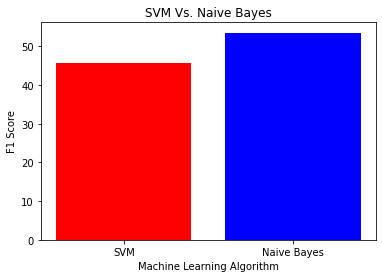

In [24]:
import matplotlib.pyplot as plt

x_units = ['SVM', 'Naive Bayes']

y_units = [f1_score(predictions_SVM, y_test)*100, f1_score(predicted, y_test)*100]

model_label = ['SVM', 'Naive Bayes']

plt.bar(x_units, y_units, tick_label=model_label,
        width=0.8, color=['red', 'blue'])

plt.xlabel('Machine Learning Algorithm')
plt.ylabel('F1 Score')
plt.title('SVM Vs. Naive Bayes')

 

plt.show()

# Parameter Tuning (C, Alpha)

In [25]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

SVM = svm.SVC(C=10.0, kernel='linear')
SVM.fit(X_train, y_train)
predictions_SVM = SVM.predict(X_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM, y_test)*100)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions_SVM)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions_SVM)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions_SVM)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions_SVM)
print('F1 score: %f' % f1)

SVM Accuracy Score ->  56.19886721208307
Accuracy: 0.561989
Precision: 0.563394
Recall: 0.387541
F1 score: 0.459207


In [26]:
# https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=10.0).fit(X_train, y_train)
import numpy as np

predicted = model.predict(X_test)


print("Naive Bayes Accuracy Score -> ", np.mean(predicted == y_test))

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predicted)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predicted)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predicted)
print('F1 score: %f' % f1)


Naive Bayes Accuracy Score ->  0.5641913152926369
Accuracy: 0.564191
Precision: 0.547814
Recall: 0.525902
F1 score: 0.536634


### 5. Application of Pre-Processing Techniques 

More pre-processing techniques are applied for experimentation to analyze which will increase the accuracy and performance of each model since many machine learning algorithms perform better when features are on a similar scale and near to normally distributed. The pre-processing techniques performed in the two machine learning models which are Multinomial Naive Bayes and Support Vector Machine (SVM) are:
1. <b>StandardScaler</b> - standardize features by removing the mean and scaling to unit variance
2. <b>MinMaxScaler</b> - transform features by scaling each feature to a given range.

# Using Standard Scaler

In [27]:
from sklearn.model_selection import train_test_split
X = data_text_label[["AveNumOfCharWord", "LengthOfCharacter", "LengthOfWord", "RatioArticlesAndWords", "RatioAuxiliaryVerbsAndWords", "RatioConjunctionsAndWords", "RatioInterjectionsAndWords", "RatioPrepositionsAndWords", "RatioPronounsAndWords", "RatioSpacesAndCharacters", "TotalArticles", "TotalAuxiliaryVerbs", "TotalConjunctions", "TotalConsonants", "TotalInterjections", "TotalPrepositions", "TotalPronouns", "TotalSpaces", "TotalVowels"]]
y = data_text_label["gender"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

In [28]:
from sklearn import svm
from sklearn.metrics import accuracy_score
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma="auto", class_weight = None)
SVM.fit(X_train, y_train)
predictions_SVM = SVM.predict(X_test)


# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM, y_test)*100)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions_SVM)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions_SVM)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions_SVM)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions_SVM)
print('F1 score: %f' % f1)


SVM Accuracy Score ->  56.01006922592826
Accuracy: 0.560101
Precision: 0.562809
Recall: 0.373115
F1 score: 0.448738


In [29]:
from sklearn.metrics import confusion_matrix
labels = np.unique(y_test)
cmtx =  confusion_matrix(y_test, predictions_SVM, labels=labels)

pd.DataFrame(cmtx, index=labels, columns=labels)

,0,1
0,1211,442
1,956,569


In [30]:
# https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=1.0).fit(X_train, y_train)

In [31]:
import numpy as np

predicted = model.predict(X_test)

print("Naive Bayes Accuracy Score -> ", np.mean(predicted == y_test)*100)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predicted)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predicted)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predicted)
print('F1 score: %f' % f1)


Naive Bayes Accuracy Score ->  54.27942101950912
Accuracy: 0.542794
Precision: 0.524658
Recall: 0.502295
F1 score: 0.513233


In [32]:
from sklearn.metrics import confusion_matrix
labels = np.unique(y_test)
cmtx =  confusion_matrix(y_test, predicted, labels=labels)

pd.DataFrame(cmtx, index=labels, columns=labels)

,0,1
0,959,694
1,759,766


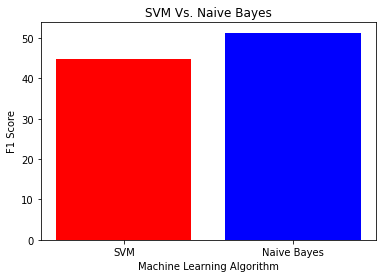

In [33]:
import matplotlib.pyplot as plt

x_units = ['SVM', 'Naive Bayes']

y_units = [f1_score(predictions_SVM, y_test)*100, f1_score(predicted, y_test)*100]

model_label = ['SVM', 'Naive Bayes']

plt.bar(x_units, y_units, tick_label=model_label,
        width=0.8, color=['red', 'blue'])

plt.xlabel('Machine Learning Algorithm')
plt.ylabel('F1 Score')
plt.title('SVM Vs. Naive Bayes')

 

plt.show()

# Using MinMax Scaler

In [34]:
from sklearn.model_selection import train_test_split
X = data_text_label[["AveNumOfCharWord", "LengthOfCharacter", "LengthOfWord", "RatioArticlesAndWords", "RatioAuxiliaryVerbsAndWords", "RatioConjunctionsAndWords", "RatioInterjectionsAndWords", "RatioPrepositionsAndWords", "RatioPronounsAndWords", "RatioSpacesAndCharacters", "TotalArticles", "TotalAuxiliaryVerbs", "TotalConjunctions", "TotalConsonants", "TotalInterjections", "TotalPrepositions", "TotalPronouns", "TotalSpaces", "TotalVowels"]]
y = data_text_label["gender"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

from sklearn import svm
from sklearn.metrics import accuracy_score
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma="auto", class_weight = None)
SVM.fit(X_train, y_train)
predictions_SVM = SVM.predict(X_test)



# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM, y_test)*100)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions_SVM)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions_SVM)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions_SVM)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions_SVM)
print('F1 score: %f' % f1)


SVM Accuracy Score ->  56.01006922592826
Accuracy: 0.560101
Precision: 0.561234
Recall: 0.381639
F1 score: 0.454333


In [35]:
from sklearn.metrics import confusion_matrix
labels = np.unique(y_test)
cmtx =  confusion_matrix(y_test, predictions_SVM, labels=labels)

pd.DataFrame(cmtx, index=labels, columns=labels)

,0,1
0,1198,455
1,943,582


In [36]:
# https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.model_selection import train_test_split
X = data_text_label[["AveNumOfCharWord", "LengthOfCharacter", "LengthOfWord", "RatioArticlesAndWords", "RatioAuxiliaryVerbsAndWords", "RatioConjunctionsAndWords", "RatioInterjectionsAndWords", "RatioPrepositionsAndWords", "RatioPronounsAndWords", "RatioSpacesAndCharacters", "TotalArticles", "TotalAuxiliaryVerbs", "TotalConjunctions", "TotalConsonants", "TotalInterjections", "TotalPrepositions", "TotalPronouns", "TotalSpaces", "TotalVowels"]]
y = data_text_label["gender"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=1.0).fit(X_train, y_train)

import numpy as np

predicted = model.predict(X_test)



print("Naive Bayes Accuracy Score -> ", np.mean(predicted == y_test)*100)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predicted)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predicted)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predicted)
print('F1 score: %f' % f1)


Naive Bayes Accuracy Score ->  54.027690371302704
Accuracy: 0.540277
Precision: 0.550794
Recall: 0.227541
F1 score: 0.322042


In [37]:
from sklearn.metrics import confusion_matrix
labels = np.unique(y_test)
cmtx =  confusion_matrix(y_test, predicted, labels=labels)

pd.DataFrame(cmtx, index=labels, columns=labels)

,0,1
0,1370,283
1,1178,347


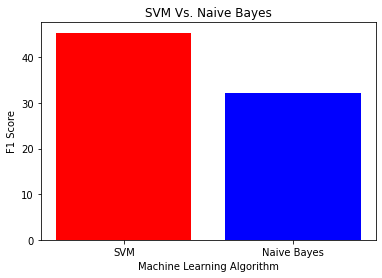

In [38]:
import matplotlib.pyplot as plt

x_units = ['SVM', 'Naive Bayes']

y_units = [f1_score(predictions_SVM, y_test)*100, f1_score(predicted, y_test)*100]

model_label = ['SVM', 'Naive Bayes']

plt.bar(x_units, y_units, tick_label=model_label,
        width=0.8, color=['red', 'blue'])

plt.xlabel('Machine Learning Algorithm')
plt.ylabel('F1 Score')
plt.title('SVM Vs. Naive Bayes')

 

plt.show()

# Normalizer with Standard Scaler


In [39]:
from sklearn.model_selection import train_test_split
X = data_text_label[["AveNumOfCharWord", "LengthOfCharacter", "LengthOfWord", "RatioArticlesAndWords", "RatioAuxiliaryVerbsAndWords", "RatioConjunctionsAndWords", "RatioInterjectionsAndWords", "RatioPrepositionsAndWords", "RatioPronounsAndWords", "RatioSpacesAndCharacters", "TotalArticles", "TotalAuxiliaryVerbs", "TotalConjunctions", "TotalConsonants", "TotalInterjections", "TotalPrepositions", "TotalPronouns", "TotalSpaces", "TotalVowels"]]
y = data_text_label["gender"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)

from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

from sklearn import svm
from sklearn.metrics import accuracy_score
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma="auto", class_weight = None)
SVM.fit(X_train, y_train)
predictions_SVM = SVM.predict(X_test)


# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM, y_test)*100)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions_SVM)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions_SVM)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions_SVM)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions_SVM)
print('F1 score: %f' % f1)


SVM Accuracy Score ->  55.160478288231594
Accuracy: 0.551605
Precision: 0.531566
Recall: 0.552131
F1 score: 0.541653


In [40]:
from sklearn.metrics import confusion_matrix
labels = np.unique(y_test)
cmtx =  confusion_matrix(y_test, predictions_SVM, labels=labels)

pd.DataFrame(cmtx, index=labels, columns=labels)

,0,1
0,911,742
1,683,842


In [41]:
# https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha=1.0).fit(X_train, y_train)

import numpy as np

predicted = model.predict(X_test)


print("Naive Bayes Accuracy Score -> ", np.mean(predicted == y_test)*100)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predicted)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predicted)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predicted)
print('F1 score: %f' % f1)


Naive Bayes Accuracy Score ->  55.947136563876654
Accuracy: 0.559471
Precision: 0.538180
Recall: 0.577705
F1 score: 0.557242


In [42]:
from sklearn.metrics import confusion_matrix
labels = np.unique(y_test)
cmtx =  confusion_matrix(y_test, predicted, labels=labels)

pd.DataFrame(cmtx, index=labels, columns=labels)

,0,1
0,897,756
1,644,881


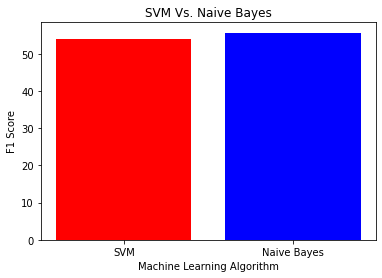

In [43]:
import matplotlib.pyplot as plt

x_units = ['SVM', 'Naive Bayes']

y_units = [f1_score(predictions_SVM, y_test)*100, f1_score(predicted, y_test)*100]

model_label = ['SVM', 'Naive Bayes']

plt.bar(x_units, y_units, tick_label=model_label,
        width=0.8, color=['red', 'blue'])

plt.xlabel('Machine Learning Algorithm')
plt.ylabel('F1 Score')
plt.title('SVM Vs. Naive Bayes')

 

plt.show()